In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [68]:
target_dict={90:'SNIa',67:'SNIa-91bg',
             52:'SNIax',42:'SNII',
             62:'SNIbc',95:'SLSN-I',
             15:'TDE',64:'KN',
             88:'AGN',92:'RRL',
             65:'M-dwarf',16:'EB',
             53:'Mira',6:'Lens-Single',
             994:'PISN', 999:'UNKNOWN', 1:'NON PISN'}
passband_list = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

In [71]:
training=pd.read_pickle("../../plasticc/param_table/Gold_train_poly.pkl")
testing=pd.read_pickle("../../plasticc/param_table/Gold_test_poly.pkl")

In [74]:
# if binary == True you will consider only 2 classes PISN or nonPISN
binary = True

if binary == True :
    isnotPISN = training['target']!=994
    training.loc[isnotPISN,'target']=1
    
classes=training['target'].unique()

In [75]:
#If you want to check your model 
X_train,X_test,y_train,y_test=train_test_split(training.loc[:,0:],training['target'],test_size=0.5,random_state=2)

# if a real prediction is needed
"""
X_train = training.loc[:,0:]
y_train = training['target']
X_test = testing.loc[:,0:]
"""

"\nX_train = training.loc[:,0:]\ny_train = training['target']\nX_test = testing.loc[:,0:]\n"

In [76]:
model=RandomForestClassifier()
forst = model.fit(X_train, y_train)

In [77]:
#On récupère l'array de toute les probas d'appartenir à chaque classe pour chaque individu
predic_train=forst.predict(X_train)

print('\nHere is the attributed classes for the first five objects :\n',predic_train[0:5])

good_prediction_train=y_train==predic_train
accuracy_train=good_prediction_train.sum()/len(good_prediction_train)
print('\nThis model has an accuracy of %.2f %% on the training sample'%(accuracy_train*100))


Here is the attributed classes for the first five objects :
 [  1 994   1 994   1]

This model has an accuracy of 100.00 % on the training sample


In [78]:
#Now let us test our model on the testing sample

predic_test=forst.predict(X_test)

good_prediction_test=y_test==predic_test
accuracy_test=good_prediction_test.sum()/len(good_prediction_test)
print('\nThis model has an accuracy of %.2f %% on the testing sample'%(accuracy_test*100))


This model has an accuracy of 95.19 % on the testing sample


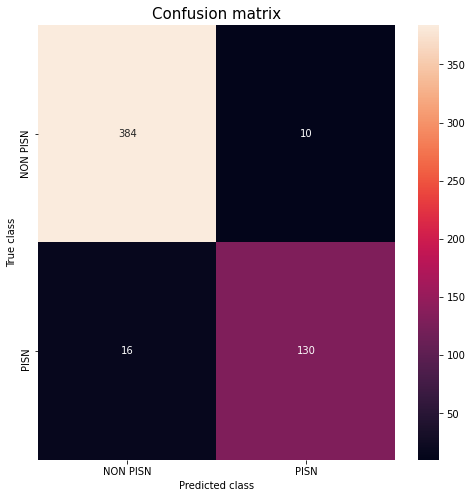

Objects predicted as PISN are really PISN 92.86 % of the time.
PISN are predicted as PISN 89.04 % of the time.


In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

    
classe_names=[]
for i in range(len(classes)):
    classe_names.append(target_dict.get(classes[i]))

# On calcul la matrice de confusion
conf_matrix = confusion_matrix(y_test, predic_test)

#On affiche la matrice de confusion
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels=classe_names, yticklabels=classe_names, annot=True, fmt="d");
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title("Confusion matrix",fontsize=15)

plt.show()

posPISN=len(conf_matrix)-1
print('Objects predicted as PISN are really PISN %.2f %% of the time.'%(100*conf_matrix[posPISN,posPISN]/conf_matrix[:,posPISN].sum()))
print('PISN are predicted as PISN %.2f %% of the time.'%(100*conf_matrix[posPISN,posPISN]/conf_matrix[posPISN,:].sum()))